# TAREA 3
- José Castillo

In [114]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from numpy.matlib import repmat

## Parte 2


Genere una imagen con ruido empleando el siguiente código (no lo modifique).  Luego desarrolle un 
filtro en la frecuencia para reducir dicho ruido. Usted debe definir el filtro más apropiado.

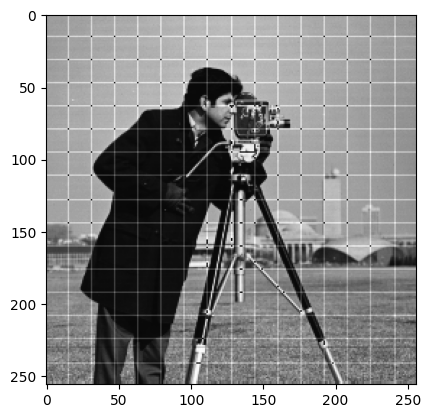

In [115]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt     
 
img = cv2.imread('cameraman.png',cv2.IMREAD_GRAYSCALE) 
m = img.shape[0] 
delta = 15 
V = np.fix(np.linspace(delta,m-delta,delta)).astype('uint8') 
 
img[V,:] = img[V,:]+50 
img[:,V] = img[:,V]+50 
plt.imshow(img, cmap='gray') 
plt.show() 




In [116]:
def btw_pts(x,y,M,N,n,fc):
# Aplicacion del filtro Butterworth 
# en una posicion especifica

# x: posicion en x (fila)
# y: posicion en y (columna)
# M: filas de la imagen
# N: columnas de la imagen
# n: orden del filtro
# fc: frecuencia de corte
# Calculo de la malla
 
    vx=np.linspace(-M/2, M/2, M)
    vy=np.linspace(-N/2, N/2, N)
    U,V=np.meshgrid(vy,vx)
    f= np.sqrt(U**2+V**2)

    T=np.ones([M,N])
    # para cada punto de la lista
    #print(len(x))
    for i in range(0, len(x)):
        
        #filtro de butterworth centrado
        H = 1- 1/(1+ (f/fc)**(2*n))
     
        # Movemos el punto del centro
        # a la posicion deseada
        a= x[i]- M/2
        b= y[i]- N/2
        H = np.roll(H, int(a), axis=0)
        H = np.roll(H, int(b), axis=1)

        T= T*H

    #Convertimos el filtro
    res= 1-T
    return (res)

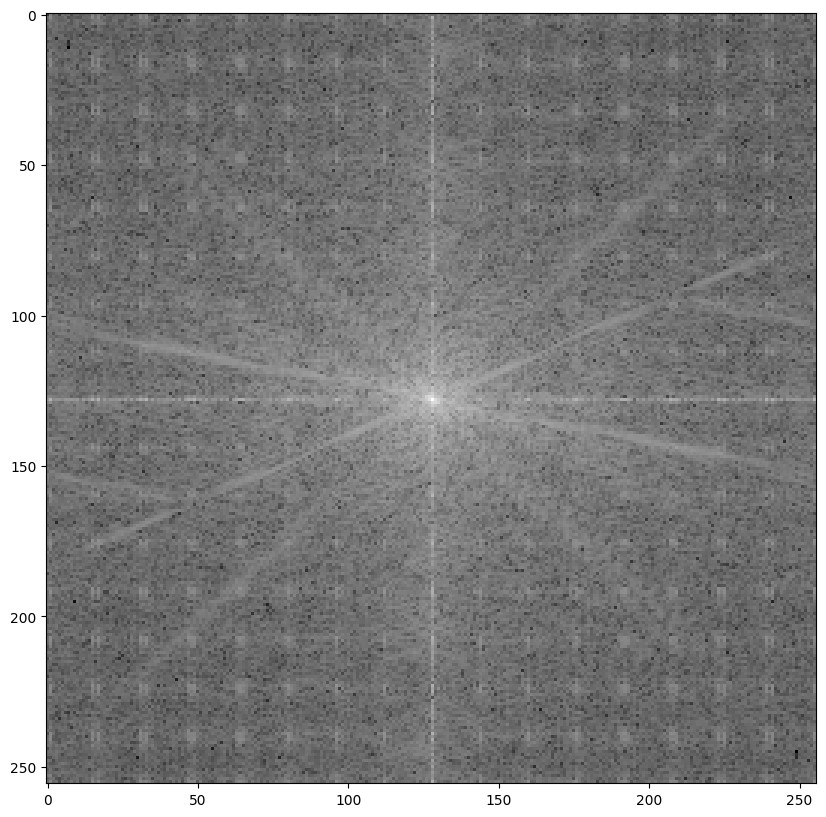

In [117]:
F = np.fft.fftshift(np.fft.fft2(img))

plt.figure(figsize=(10, 10))
plt.imshow(np.log(np.abs(F)),cmap="gray")

In [118]:
def marcar_frecuencia(imagen_ruido, a):
    m, n = imagen_ruido.shape
    intersecciones = []

    plt.figure(figsize=(10, 10))
    plt.imshow(np.log(np.abs(imagen_ruido)), cmap="gray")
    
    # Agregar líneas verticales
    for e in range(0, n, a):
        plt.axvline(x=e, color='r', linestyle='--')  # Línea vertical
    
    # Agregar líneas horizontales
    for e in range(0, m, a):
        plt.axhline(y=e, color='b', linestyle='--')  # Línea horizontal
    
    # Guardar intersecciones
    for x in range(0, n, a):
        for y in range(0, m, a):
            intersecciones.append((x, y))
    
    plt.title("FFT")
    plt.show()

    return intersecciones

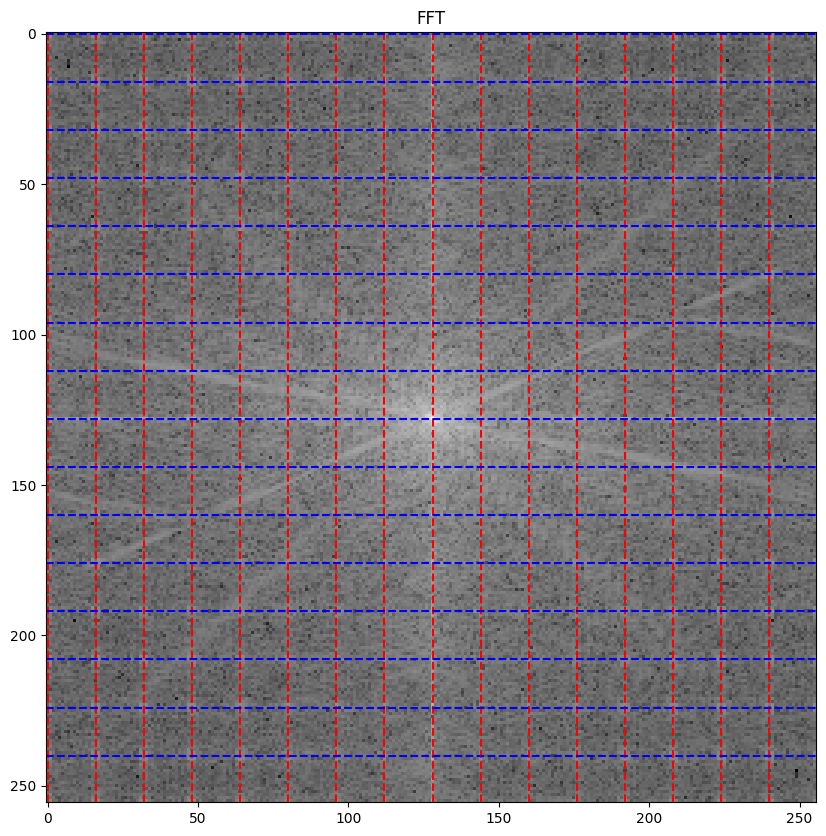

In [119]:
a = 16
intersecciones = marcar_frecuencia(F, a)

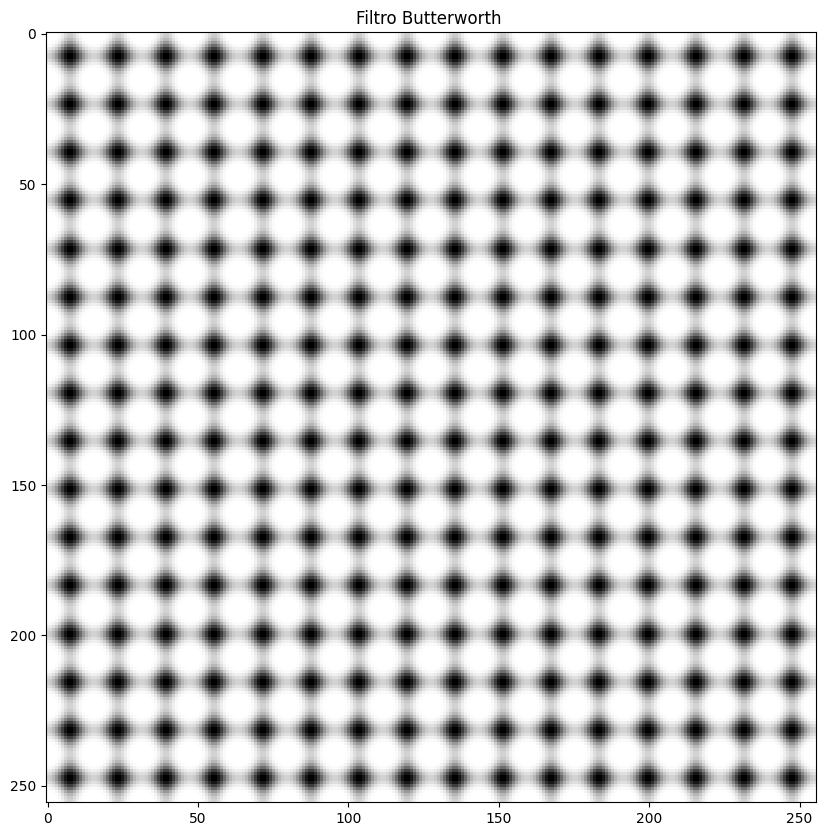

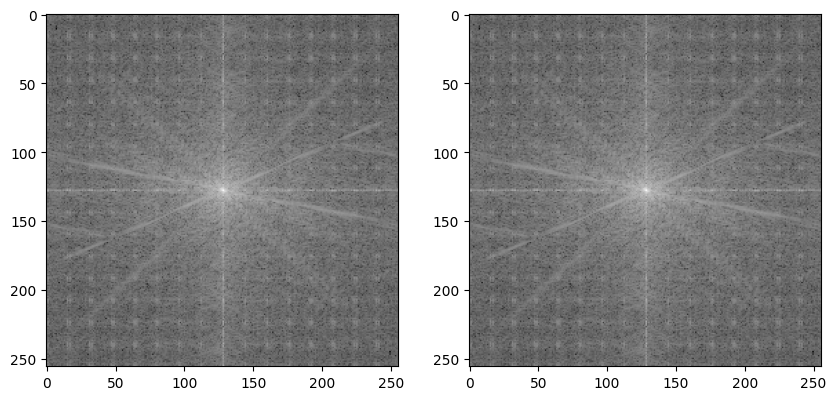

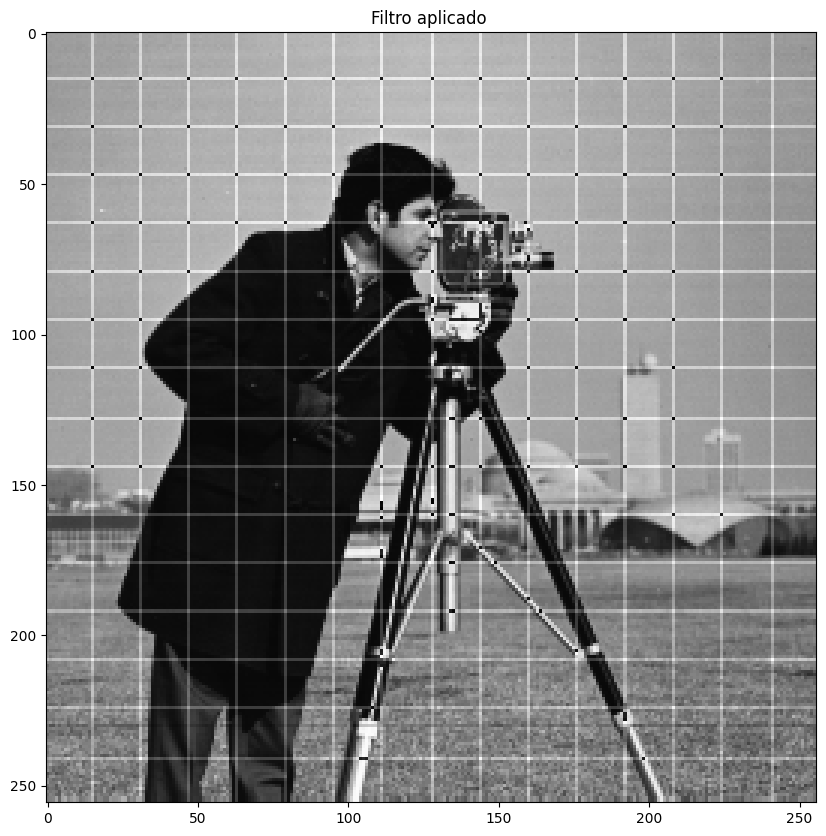

In [ ]:
x, y = zip(*intersecciones)  # Desempaquetar las intersecciones en listas de x e y
M, N = F.shape
n = 5
fc=15
filtro = btw_pts(x, y, M, N, n, fc)

ef= F*filtro

# Determinamos la imagen del ruido
eta = np.real(np.fft.ifft2(np.fft.fftshift(ef)))
# Mostrar el filtro resultante
plt.figure(figsize=(10, 10))
plt.imshow(filtro, cmap="gray")
plt.title("Filtro Butterworth ")
plt.show()
#
plt.figure(figsize=(10, 10))
plt.subplot(121),plt.imshow(np.log(np.abs(F)), cmap="gray")
plt.subplot(122),plt.imshow(np.log(np.abs(ef)), cmap="gray")
plt.show()
# Mostrar el filtro resultante
plt.figure(figsize=(10, 10))

plt.imshow(eta, cmap="gray")
plt.title("Filtro aplicado ")
plt.show()


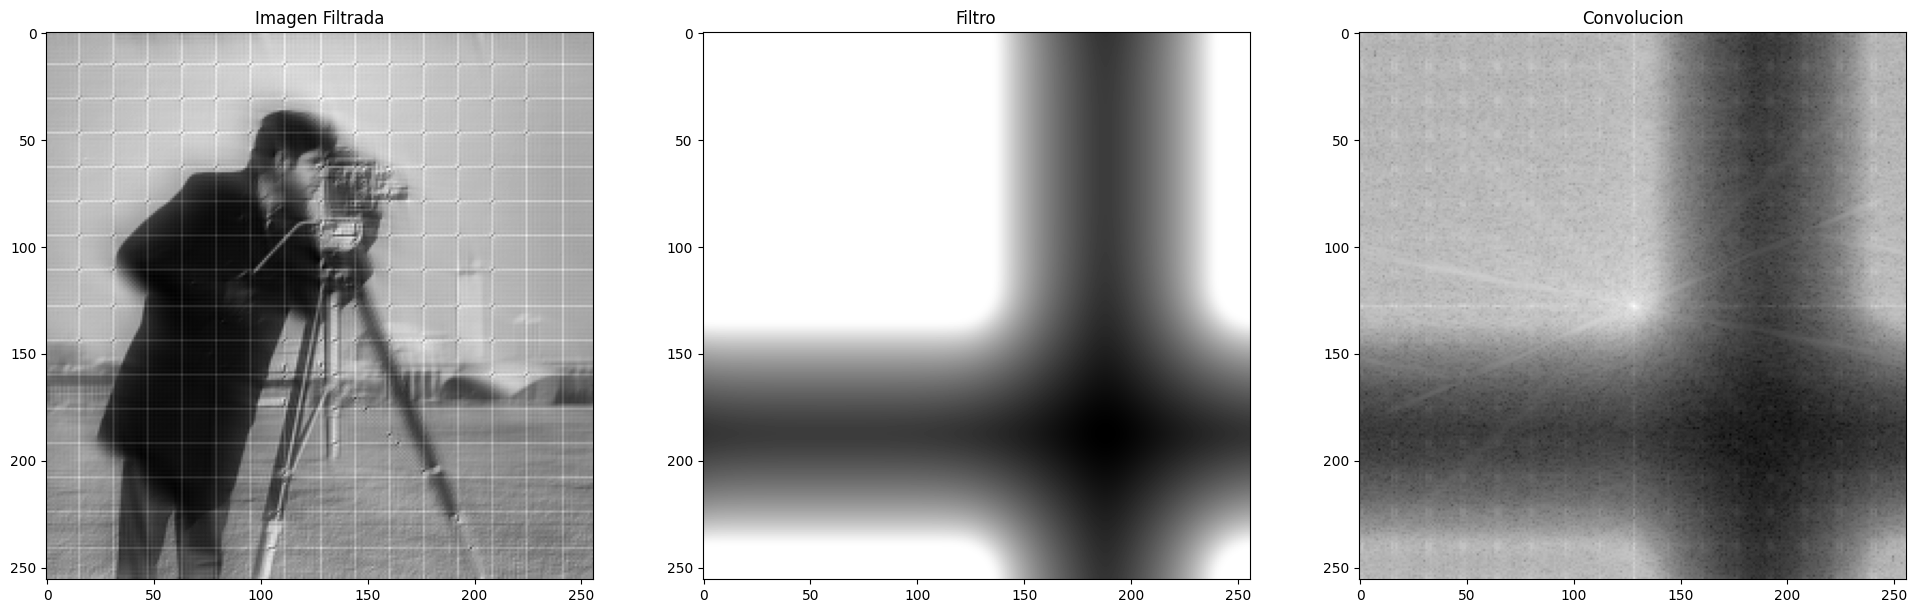

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Filtro Butterworth en una posición específica
def btw_pts(x,y,M,N,n,fc):
# Aplicacion del filtro Butterworth 
# en una posicion especifica

# x: posicion en x (fila)
# y: posicion en y (columna)
# M: filas de la imagen
# N: columnas de la imagen
# n: orden del filtro
# fc: frecuencia de corte
# Calculo de la malla
 
    vx=np.linspace(-M/2, M/2, M)
    vy=np.linspace(-N/2, N/2, N)
    U,V=np.meshgrid(vy,vx)
    f= np.sqrt(U**2+V**2)

    T=np.ones([M,N])
    # para cada punto de la lista
    #print(len(x))
    for i in range(0, len(x)):
        
        #filtro de butterworth centrado
        H = 1- 1/(1+ (f/fc)**(2*n))
     
        # Movemos el punto del centro
        # a la posicion deseada
        a= x[i]- M/2
        b= y[i]- N/2
        H = np.roll(H, int(a), axis=0)
        H = np.roll(H, int(b), axis=1)

        T= T*H

    #Convertimos el filtro
    res= 1-T
    return (res)

# Cargar la imagen

m, n = img.shape

# Definir manualmente las coordenadas de los puntos
coords =intersecciones  # Ejemplo de coordenadas

# Convertir las coordenadas
x = np.array([coord[1] for coord in coords]) / 2
y = np.array([coord[0] for coord in coords]) / 2

# Paso 1: Determinar el espectro de la imagen
F = np.fft.fft2(img)
FS = np.fft.fftshift(F)
img_fq = np.real( np.log(np.abs(FS)))

# Paso 2: Aplicar el filtro Butterworth
od = 6
fc = 17
HB = btw_pts(x, y, m, n, od, fc)
ef = FS * HB
eta = np.real(np.fft.ifft2(np.fft.fftshift(ef)))

# Mostrar resultados
plt.figure(figsize=(24, 12))
plt.subplot(131),plt.imshow(eta, cmap='gray'),plt.title("Imagen Filtrada")
plt.subplot(132),plt.imshow(np.log(np.abs(HB)) , cmap='gray'),plt.title("Filtro")
plt.subplot(133),plt.imshow(np.log(np.abs(ef))  , cmap='gray'),plt.title("Convolucion")
plt.show()


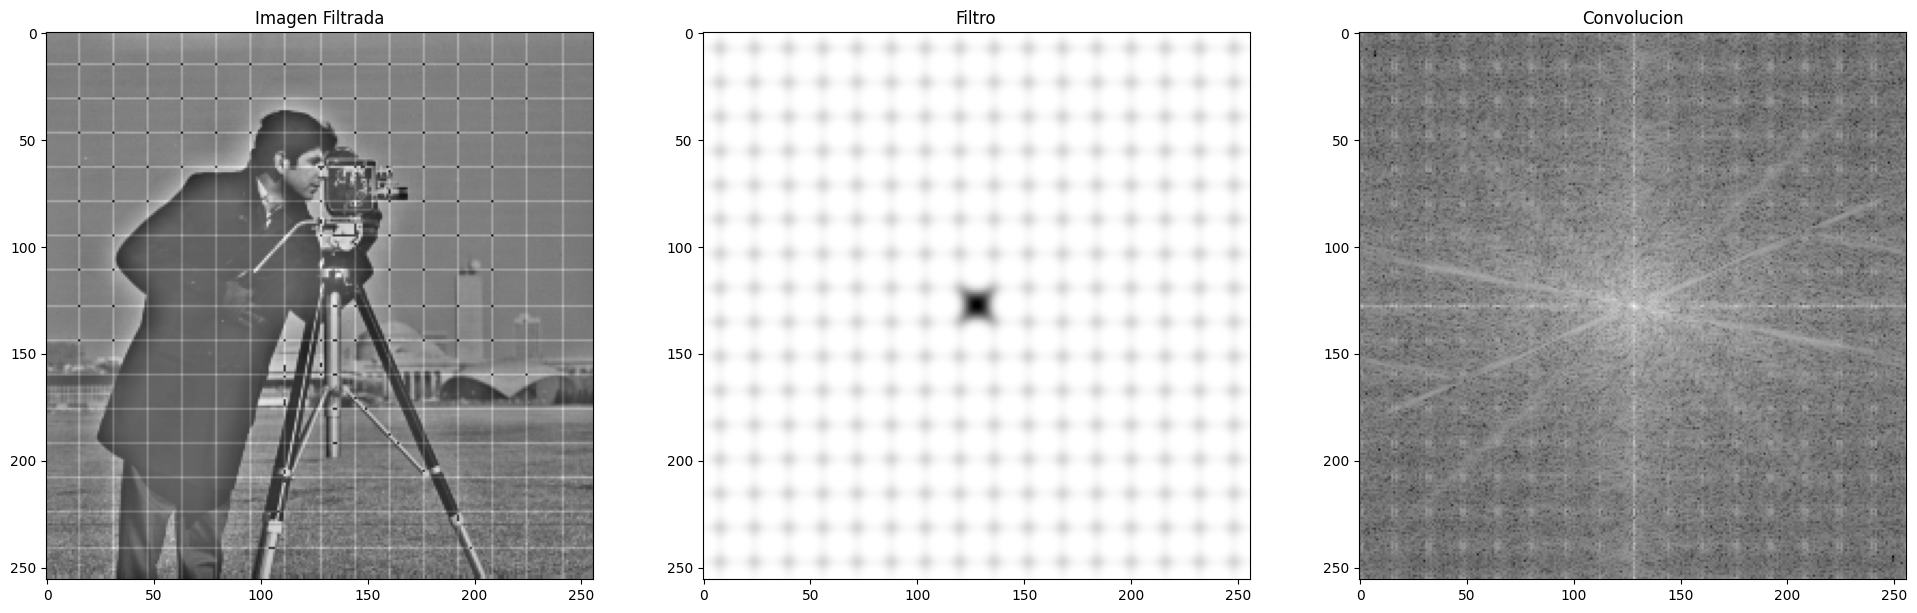

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Filtro Butterworth en una posición específica
def btw_pts(x,y,M,N,n,fc):
# Aplicacion del filtro Butterworth 
# en una posicion especifica

# x: posicion en x (fila)
# y: posicion en y (columna)
# M: filas de la imagen
# N: columnas de la imagen
# n: orden del filtro
# fc: frecuencia de corte
# Calculo de la malla
 
    vx=np.linspace(-M/2, M/2, M)
    vy=np.linspace(-N/2, N/2, N)
    U,V=np.meshgrid(vy,vx)
    f= np.sqrt(U**2+V**2)

    T=np.ones([M,N])
    # para cada punto de la lista
    #print(len(x))
    for i in range(0, len(x)):
        
        #filtro de butterworth centrado
        H = 1- 1/(1+ (f/fc)**(2*n))
     
        # Movemos el punto del centro
        # a la posicion deseada
        a= x[i]- M/2
        b= y[i]- N/2
        H = np.roll(H, int(a), axis=0)
        H = np.roll(H, int(b), axis=1)

        T= T*H

    #Convertimos el filtro
    res= 1-T
    return (res)

# Cargar la imagen

m, n = img.shape

# Definir manualmente las coordenadas de los puntos
coords =intersecciones  # Ejemplo de coordenadas

# Convertir las coordenadas
x = np.array([coord[1] for coord in coords]) 
y = np.array([coord[0] for coord in coords]) 

# Paso 1: Determinar el espectro de la imagen
F = np.fft.fft2(img)
FS = np.fft.fftshift(F)
img_fq = np.real(0.1 * np.log(np.abs(FS)))

# Paso 2: Aplicar el filtro Butterworth
od = 3
fc = 10
HB = btw_pts(x, y, m, n, od, fc)
ef = FS * HB
eta = np.real(np.fft.ifft2(np.fft.fftshift(ef)))

# Mostrar resultados
plt.figure(figsize=(24, 12))
plt.subplot(131),plt.imshow(eta, cmap='gray'),plt.title("Imagen Filtrada")
plt.subplot(132),plt.imshow(np.log(np.abs(HB)) , cmap='gray'),plt.title("Filtro")
plt.subplot(133),plt.imshow(np.log(np.abs(ef))  , cmap='gray'),plt.title("Convolucion")
plt.show()
